# Bit Flip Error Correction Implementation
This is an implementation of the bit flip algorithm for correcting a bit flip error in a quantum circuit.

## Step 0 - Imports

In [10]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

## Step 1 - Initialise Circuit
We start with a 3-qubit register and add a classical bit to measure.

In [13]:
circuit = QuantumCircuit(3, 1)

## Step 2 - Apply CNOT
Transfer state of qubit 1 (control) to the ancillary qubits (targets). This is in preparation for simulating a bit flip error that we will correct.

In [14]:
circuit.cx(0, 1)
circuit.cx(0, 2)

## Step 3 - Simulate a Bit Flip Error
We manually flip a bit to simulate a random flip caused by qubit instability.

In [15]:
circuit.x(0)

## Step 4 - Apply CNOTs Again
We decode the state by applying CNOT gates after flipping qubit 0. This gives us the error syndrome.

In [16]:
circuit.cx(0,1)
circuit.cx(0,2)

## Step 5 - Apply Toffoli Gate
We apply the Toffoli/controlled-controlled-X gate to correct the error that we detected in step 4.

In [17]:
circuit.ccx(2, 1, 0)

## Step 6 - Measure and Draw

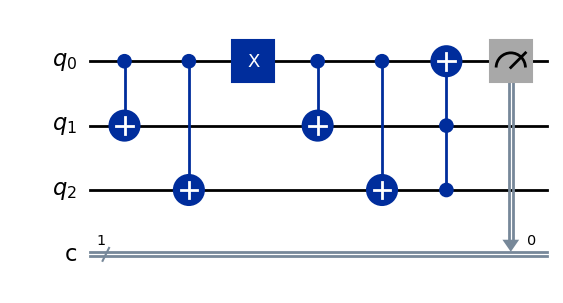

In [18]:
circuit.measure(0,0)
circuit.draw('mpl')

## Step 7 - Run or Simulate
We can easily simulate this (running requires access to IBM quantum computers).

In [19]:
simulator = AerSimulator()
circuit = transpile(circuit, simulator)

result = simulator.run(circuit).result()
counts = result.get_counts(circuit)

print(counts)

{'0': 1024}
